In [1]:
import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup
from urllib.parse import quote
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [2]:
# url 가져오기 
url = 'https://www.imdb.com/title/tt0111161/reviews/?ref_=tt_ql_2'
driver = webdriver.Chrome('C:/Users/YONSAI/Downloads/chromedriver.exe')
driver.get(url)
# soup = BeautifulSoup(driver.page_source, 'html.parser')

In [3]:
# 페이지 늘리기 (더보기 클릭)
for i in range(39):
    driver.find_element(By.CSS_SELECTOR, '#load-more-trigger').click()
    time.sleep(5)

In [4]:
# 다 늘린 페이지 스프로 만들어주기
soup = BeautifulSoup(driver.page_source, 'html.parser')

In [5]:
# 한개의 리뷰 전체를 select하기
divs = soup.select('.lister-item-content')
len(divs)

997

In [6]:
# 한개의 리뷰 전체 divs와 divs의 차이가 없어보인다
div = divs[0]
div

<div class="lister-item-content">
<div class="ipl-ratings-bar">
<span class="rating-other-user-rating">
<svg class="ipl-icon ipl-star-icon" fill="#000000" height="24" viewbox="0 0 24 24" width="24" xmlns="http://www.w3.org/2000/svg">
<path d="M0 0h24v24H0z" fill="none"></path>
<path d="M12 17.27L18.18 21l-1.64-7.03L22 9.24l-7.19-.61L12 2 9.19 8.63 2 9.24l5.46 4.73L5.82 21z"></path>
<path d="M0 0h24v24H0z" fill="none"></path>
</svg>
<span>10</span><span class="point-scale">/10</span>
</span>
</div>
<a class="title" href="/review/rw2284594/?ref_=tt_urv"> Some birds aren't meant to be caged.
</a> <div class="display-name-date">
<span class="display-name-link"><a href="/user/ur16161013/?ref_=tt_urv">hitchcockthelegend</a></span><span class="review-date">24 July 2010</span>
</div>
<span class="spoiler-warning">Warning: Spoilers</span>
<div class="actions text-muted">
                    885 out of 953 found this helpful.
                        <span>
                            Was this re

In [7]:
# 리뷰 제목 
title = div.select_one('.title').get_text().strip()
title

"Some birds aren't meant to be caged."

In [20]:
# 평점
repus = div.select('div.ipl-ratings-bar > span > span')
for repu in repus:
    grade = repu.get_text().replace("/",'')
    if repu == None:
        continue
print(repu)

10


In [9]:
# 리뷰 내용
div.select_one('.text.show-more__control').get_text()

'The Shawshank Redemption is written and directed by Frank Darabont. It is an adaptation of the Stephen King novella Rita Hayworth and Shawshank Redemption. Starring Tim Robbins and Morgan Freeman, the film portrays the story of Andy Dufresne (Robbins), a banker who is sentenced to two life sentences at Shawshank State Prison for apparently murdering his wife and her lover. Andy finds it tough going but finds solace in the friendship he forms with fellow inmate Ellis "Red" Redding (Freeman). While things start to pick up when the warden finds Andy a prison job more befitting his talents as a banker. However, the arrival of another inmate is going to vastly change things for all of them.There was no fanfare or bunting put out for the release of the film back in 94, with a title that didn\'t give much inkling to anyone about what it was about, and with Columbia Pictures unsure how to market it, Shawshank Redemption barely registered at the box office. However, come Academy Award time the

In [37]:
# 하나의 리뷰 가져와보기
lines1 = []
for div in divs:
    title = div.select_one('.title').get_text().strip()
    review = div.select_one('.text.show-more__control').get_text()
    repus = div.select('div.ipl-ratings-bar > span > span')
    for repu in repus:
        grade = repu.get_text().replace("/",'')
        if repu == None:
            continue
    lines1.append({'리뷰':review, '제목':title, '평점':int(grade)})

In [38]:
lines1

[{'리뷰': 'The Shawshank Redemption is written and directed by Frank Darabont. It is an adaptation of the Stephen King novella Rita Hayworth and Shawshank Redemption. Starring Tim Robbins and Morgan Freeman, the film portrays the story of Andy Dufresne (Robbins), a banker who is sentenced to two life sentences at Shawshank State Prison for apparently murdering his wife and her lover. Andy finds it tough going but finds solace in the friendship he forms with fellow inmate Ellis "Red" Redding (Freeman). While things start to pick up when the warden finds Andy a prison job more befitting his talents as a banker. However, the arrival of another inmate is going to vastly change things for all of them.There was no fanfare or bunting put out for the release of the film back in 94, with a title that didn\'t give much inkling to anyone about what it was about, and with Columbia Pictures unsure how to market it, Shawshank Redemption barely registered at the box office. However, come Academy Award 

In [39]:
import pandas as pd
pd.DataFrame(lines1)

,리뷰,제목,평점
0,The Shawshank Redemption is written and direct...,Some birds aren't meant to be caged.,10
1,It is no wonder that the film has such a high ...,An incredible movie. One that lives with you.,10
2,I'm trying to save you money; this is the last...,Don't Rent Shawshank.,10
3,This movie is not your ordinary Hollywood flic...,This is How Movies Should Be Made,10
4,"In its Oscar year, Shawshank Redemption (writt...",A classic piece of unforgettable film-making.,10
...,...,...,...
992,This is a classic about hope. Hope is not in p...,The Shawshank Redemption,10
993,"Off the hop, I don't mean to upset people with...",Resilience prevails.,10
994,This movie is one of the greatest I have ever ...,The Reason I don't pay attention to the Oscars,10
995,Let me analyze why people keep giving 10 point...,Analyzing 10 points,10


In [42]:
url = 'https://www.imdb.com/title/tt0111161/reviews/?ref_=tt_ql_2'
driver = webdriver.Chrome('C:/Users/YONSAI/Downloads/chromedriver.exe')
driver.get(url)
for i in range(39):
    driver.find_element(By.CSS_SELECTOR, '#load-more-trigger').click() # 더보기클릭
    time.sleep(5)
soup = BeautifulSoup(driver.page_source, 'html.parser') # 페이지펼친후 스프
divs = soup.select('.lister-item-content') # 한개의리뷰전체
div = divs[0] 
lines = []
for div in divs:
    title = div.select_one('.title').get_text().strip()
    review = div.select_one('.text.show-more__control').get_text()
    repus = div.select('div.ipl-ratings-bar > span > span')
    for repu in repus:
        grade = repu.get_text().replace("/",'')
        if repu == None:
            continue
    lines.append({'제목':title, '리뷰':review, '평점':int(grade)})

In [43]:
df = pd.DataFrame(lines)
df

,제목,리뷰,평점
0,Some birds aren't meant to be caged.,The Shawshank Redemption is written and direct...,10
1,An incredible movie. One that lives with you.,It is no wonder that the film has such a high ...,10
2,Don't Rent Shawshank.,I'm trying to save you money; this is the last...,10
3,This is How Movies Should Be Made,This movie is not your ordinary Hollywood flic...,10
4,A classic piece of unforgettable film-making.,"In its Oscar year, Shawshank Redemption (writt...",10
...,...,...,...
992,The Shawshank Redemption,This is a classic about hope. Hope is not in p...,10
993,Resilience prevails.,"Off the hop, I don't mean to upset people with...",10
994,The Reason I don't pay attention to the Oscars,This movie is one of the greatest I have ever ...,10
995,Analyzing 10 points,Let me analyze why people keep giving 10 point...,10


In [44]:
df.to_csv('data/shawreview.txt' ,index=False)

In [45]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image 
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords 
from nltk.corpus import stopwords 

In [46]:
with open('data/shawreview.txt') as file:
    text = file.read()    # 줄 단위로 리스트를 만들어 줌
print(text)

제목,리뷰,평점
Some birds aren't meant to be caged.,"The Shawshank Redemption is written and directed by Frank Darabont. It is an adaptation of the Stephen King novella Rita Hayworth and Shawshank Redemption. Starring Tim Robbins and Morgan Freeman, the film portrays the story of Andy Dufresne (Robbins), a banker who is sentenced to two life sentences at Shawshank State Prison for apparently murdering his wife and her lover. Andy finds it tough going but finds solace in the friendship he forms with fellow inmate Ellis ""Red"" Redding (Freeman). While things start to pick up when the warden finds Andy a prison job more befitting his talents as a banker. However, the arrival of another inmate is going to vastly change things for all of them.There was no fanfare or bunting put out for the release of the film back in 94, with a title that didn't give much inkling to anyone about what it was about, and with Columbia Pictures unsure how to market it, Shawshank Redemption barely registered at the b

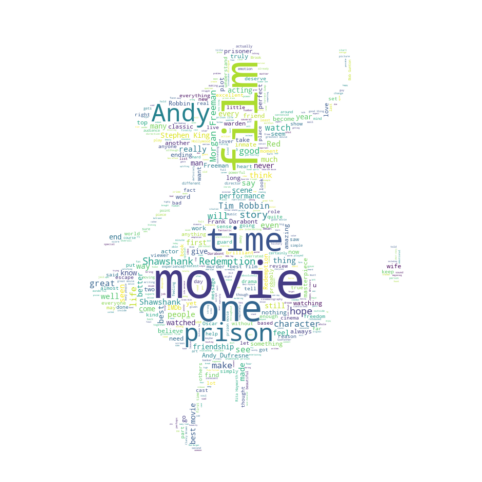

In [52]:
sw_wc = STOPWORDS

mask = np.array(Image.open('data/Alice_mask.png')) # numpy로 만들어줘야 그림을사용가능

wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=sw_wc,
    mask=mask 
    ).generate(text)

plt.figure(figsize=(8,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

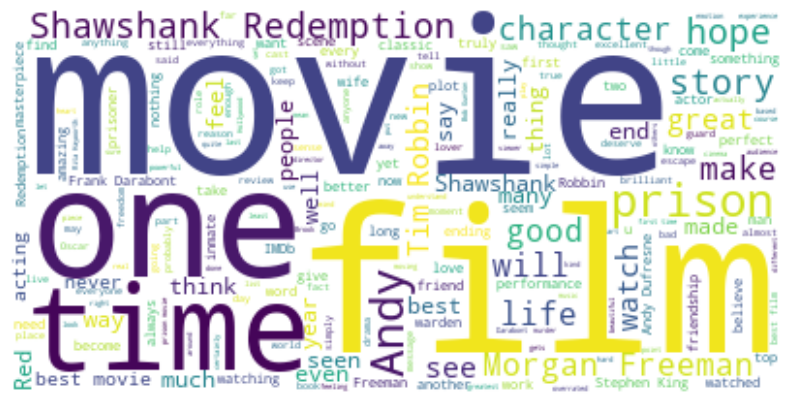

In [51]:
plt.figure(figsize=(10,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()